In [1]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings (not recommended unless you fully understand the consequences)
warnings.filterwarnings("ignore")


# 1. Problem statement and EDA:

### 1.1 Business problem:
We need to build capable system after making this data useful so that we can improve the quality, efficiency and profitability of the business.
Currently the data just came out from the pipeline and we need to modify it to draw insights.

### 1.2 Basic data related observation:

In [2]:
df = pd.read_csv('delhivery_data.csv')

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.shape

(144867, 24)

In [5]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [6]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
# checking any null values
df.columns[df.isnull().any()]

Index(['source_name', 'destination_name'], dtype='object')

#### Observation: We have missing values in ['source_name', 'destination_name'], and we will drop the rows

In [9]:
df1 = df.dropna()

In [10]:
print('Percentage of data left after removing missing values',np.round(df1.shape[0]*100/df.shape[0],2),'%')

Percentage of data left after removing missing values 99.62 %


In [11]:
df = df1
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [12]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


### Droping the columns which are unknown to us:
1. is_cutoff
2. cutoff_factor
3. cutoff_timestamp
4. factor
5. segment_factor

In [13]:
# droping multiple columns and axis=1 for columns
df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace=True)

In [14]:
df.head(50)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [15]:
# Converting the trip_creation_time into datetime forrmat
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [17]:
df.head(15)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


## Problem:
Here we have 'actual_distance_to_destination' and its a commulative distance, so we will create a new column which will have the segment wise actual distance on basis of source center and destination center

In [18]:
# creatin a fn to seperate segment wise actual distance from commulative actual distance
def segment_wise_distance(df):
    # Calculate segment distances based on source_center
    df['segment_actual_distance'] = df.groupby('source_center')['actual_distance_to_destination'].diff().fillna(df['actual_distance_to_destination'])
    return df 

In [19]:
df = segment_wise_distance(df)
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,10.435660
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,8.501182
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,8.700437
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,8.480749
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,3.268012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,7.852187
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,8.834254
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,12.071060
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,7.517076


In [20]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'segment_actual_distance'],
      dtype='object')

In [21]:
df['segment_actual_distance']

0         10.435660
1          8.501182
2          8.700437
3          8.480749
4          3.268012
            ...    
144862     7.852187
144863     8.834254
144864    12.071060
144865     7.517076
144866    -3.641657
Name: segment_actual_distance, Length: 144316, dtype: float64

In [22]:
# creating new features by seperating state and city
df['source_city'] = df['source_name'].str.split(' \(', expand=True)[0]
df['source_state'] = df['source_name'].str.extract('\((.*?)\)')
df['destination_city'] = df['destination_name'].str.split(' \(', expand=True)[0]
df['destination_state'] = df['destination_name'].str.extract('\((.*?)\)')

In [23]:
df.actual_distance_to_destination.head(50)

0      10.435660
1      18.936842
2      27.637279
3      36.118028
4      39.386040
5      10.403038
6      18.045481
7      28.061896
8      38.939167
9      43.595802
10     23.194334
11     44.045659
12     72.849327
13     88.076599
14    100.708423
15      9.355852
16     16.431273
17     23.635811
18     39.806036
19     24.319864
20     44.436577
21     67.734827
22     89.319713
23    110.620443
24    134.700556
25    154.847431
26    177.553953
27    199.798505
28    220.400885
29    242.926420
30    267.173797
31    292.058718
32    308.852339
33    331.494166
34    331.652400
35     23.583306
36     36.623172
37     20.456544
38     22.238037
39     38.408783
40     10.259661
41     18.973336
42     27.176034
43     31.692506
44      9.756514
45     18.921122
46     27.023472
47     28.340661
48      9.518243
49     18.705980
Name: actual_distance_to_destination, dtype: float64

In [24]:
# doping the columns 
df.drop(columns = ['source_name','destination_name'],inplace=True)

In [25]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance,source_city,source_state,destination_city,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.0,11.9653,14.0,11.0,11.9653,10.435660,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,20.0,21.7243,10.0,9.0,9.7590,8.501182,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,28.0,32.5395,16.0,7.0,10.8152,8.700437,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,40.0,45.5620,21.0,12.0,13.0224,8.480749,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,44.0,54.2181,6.0,5.0,3.9153,3.268012,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat


In [26]:
df['trip_creation_date'] = df['trip_creation_time'].dt.date
df['trip_creation_time'] = df['trip_creation_time'].dt.time

In [27]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance,source_city,source_state,destination_city,destination_state,trip_creation_date
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.9653,14.0,11.0,11.9653,10.435660,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,21.7243,10.0,9.0,9.7590,8.501182,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,32.5395,16.0,7.0,10.8152,8.700437,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,45.5620,21.0,12.0,13.0224,8.480749,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,54.2181,6.0,5.0,3.9153,3.268012,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,67.9280,12.0,12.0,8.1858,7.852187,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018-09-20
144863,training,16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,85.6829,26.0,21.0,17.3725,8.834254,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018-09-20
144864,training,16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,97.0933,20.0,34.0,20.7053,12.071060,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018-09-20
144865,training,16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,111.2709,17.0,27.0,18.8885,7.517076,Sonipat_Kundli_H,Haryana,Gurgaon_Bilaspur_HB,Haryana,2018-09-20


In [28]:
df.columns

# Define a function to check if the source and destination states are the same
def state_category(row):
    if row['source_state'] == row['destination_state']:
        return f'Intra State ({row["source_state"]})'
    else:
        return f'Inter State ({row["source_state"]} to {row["destination_state"]})'

# Apply the function to create a new column 'trip_category'
df['trip_category'] = df.apply(state_category, axis=1)

In [29]:
# Combine 'source_city' and 'destination_city' columns
df['source to destination'] = df['source_city'] + ' to ' + df['destination_city']
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time,segment_osrm_distance,segment_actual_distance,source_city,source_state,destination_city,destination_state,trip_creation_date,trip_category,source to destination
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.0,11.9653,10.435660,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,9.0,9.7590,8.501182,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,7.0,10.8152,8.700437,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,12.0,13.0224,8.480749,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,5.0,3.9153,3.268012,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Gujarat,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D


### Now we can drop the source state and destination state column since we created the new column names 'source to destination'

In [30]:
# droppin the columns
df.drop(columns = ['source_state','destination_state','source_city','destination_city'],inplace=True)


In [31]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance,trip_creation_date,trip_category,source to destination
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,14.0,11.0,11.9653,14.0,11.0,11.9653,10.435660,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,24.0,20.0,21.7243,10.0,9.0,9.7590,8.501182,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,40.0,28.0,32.5395,16.0,7.0,10.8152,8.700437,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,62.0,40.0,45.5620,21.0,12.0,13.0224,8.480749,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,68.0,44.0,54.2181,6.0,5.0,3.9153,3.268012,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   destination_center              144316 non-null  object        
 7   od_start_time                   144316 non-null  datetime64[ns]
 8   od_end_time                     144316 non-null  datetime64[ns]
 9   start_scan_to_end_scan          144316 non-null  float64       
 10  actual_distance_to_destination  144316 non-null  float64     

In [33]:
# Convert columns to datetime
df['od_start_time'] = pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S.%f')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S.%f')

# Calculate the duration in minutes
df['duration_minutes'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

# Display the DataFrame with duration in minutes
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance,trip_creation_date,trip_category,source to destination,duration_minutes
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.0,11.9653,14.0,11.0,11.9653,10.435660,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,20.0,21.7243,10.0,9.0,9.7590,8.501182,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,28.0,32.5395,16.0,7.0,10.8152,8.700437,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,40.0,45.5620,21.0,12.0,13.0224,8.480749,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,44.0,54.2181,6.0,5.0,3.9153,3.268012,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637


### Now we can drop the od_start_time and od_end_time as we have created the duration minutes column from the difference of these two columns

In [34]:
df.drop(columns = ['od_start_time','od_end_time'],inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   destination_center              144316 non-null  object 
 7   start_scan_to_end_scan          144316 non-null  float64
 8   actual_distance_to_destination  144316 non-null  float64
 9   actual_time                     144316 non-null  float64
 10  osrm_time                       144316 non-null  float64
 11  osrm_distance                   144316 non-null  float64
 12  segment_actual_time  

In [36]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance,trip_creation_date,trip_category,source to destination,duration_minutes
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,10.435660,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,8.501182,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,8.700437,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,8.480749,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,3.268012,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637


In [37]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance,trip_creation_date,trip_category,source to destination,duration_minutes
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,10.435660,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,8.501182,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,8.700437,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,8.480749,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,3.268012,2018-09-20,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637


In [38]:
import pandas as pd

# Assuming your DataFrame is named 'df' and it has a 'trip_creation_date' column
# If 'trip_creation_date' is not in datetime format, convert it first
df['trip_creation_date'] = pd.to_datetime(df['trip_creation_date'])

# Extract year, month, day, and name of the day
df['year'] = df['trip_creation_date'].dt.year
df['month'] = df['trip_creation_date'].dt.month
df['day'] = df['trip_creation_date'].dt.day
df['day_name'] = df['trip_creation_date'].dt.day_name()




In [39]:
from datetime import datetime

In [40]:
df['month'] = df['month'].apply(lambda x: datetime.strptime(str(x), "%m").strftime("%B"))


In [41]:
df.drop(columns = 'trip_creation_date',inplace=True)

In [42]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,segment_osrm_time,segment_osrm_distance,segment_actual_distance,trip_category,source to destination,duration_minutes,year,month,day,day_name
0,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,...,11.0,11.9653,10.435660,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637,2018,September,20,Thursday
1,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,...,9.0,9.7590,8.501182,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637,2018,September,20,Thursday
2,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,...,7.0,10.8152,8.700437,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637,2018,September,20,Thursday
3,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,...,12.0,13.0224,8.480749,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637,2018,September,20,Thursday
4,training,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,...,5.0,3.9153,3.268012,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,86.213637,2018,September,20,Thursday


In [43]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_distance',
       'trip_category', 'source to destination', 'duration_minutes', 'year',
       'month', 'day', 'day_name'],
      dtype='object')

In [44]:
df = df[['data','year','month', 'day','day_name','trip_creation_time','route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center','trip_category', 'source to destination',
       'start_scan_to_end_scan','duration_minutes','actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_distance',
       ]]

In [45]:
df.shape

(144316, 23)

In [46]:
df.head()

,data,year,month,day,day_name,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,...,start_scan_to_end_scan,duration_minutes,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance
0,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,10.435660
1,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,8.501182
2,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,8.700437
3,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,8.480749
4,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,3.268012


### Visual Analysis of route type:

In [47]:
df.dtypes

data                               object
year                                int32
month                              object
day                                 int32
day_name                           object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
destination_center                 object
trip_category                      object
source to destination              object
start_scan_to_end_scan            float64
duration_minutes                  float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_actual_distance           float64
dtype: object

## Boxplots to detect outliers : 

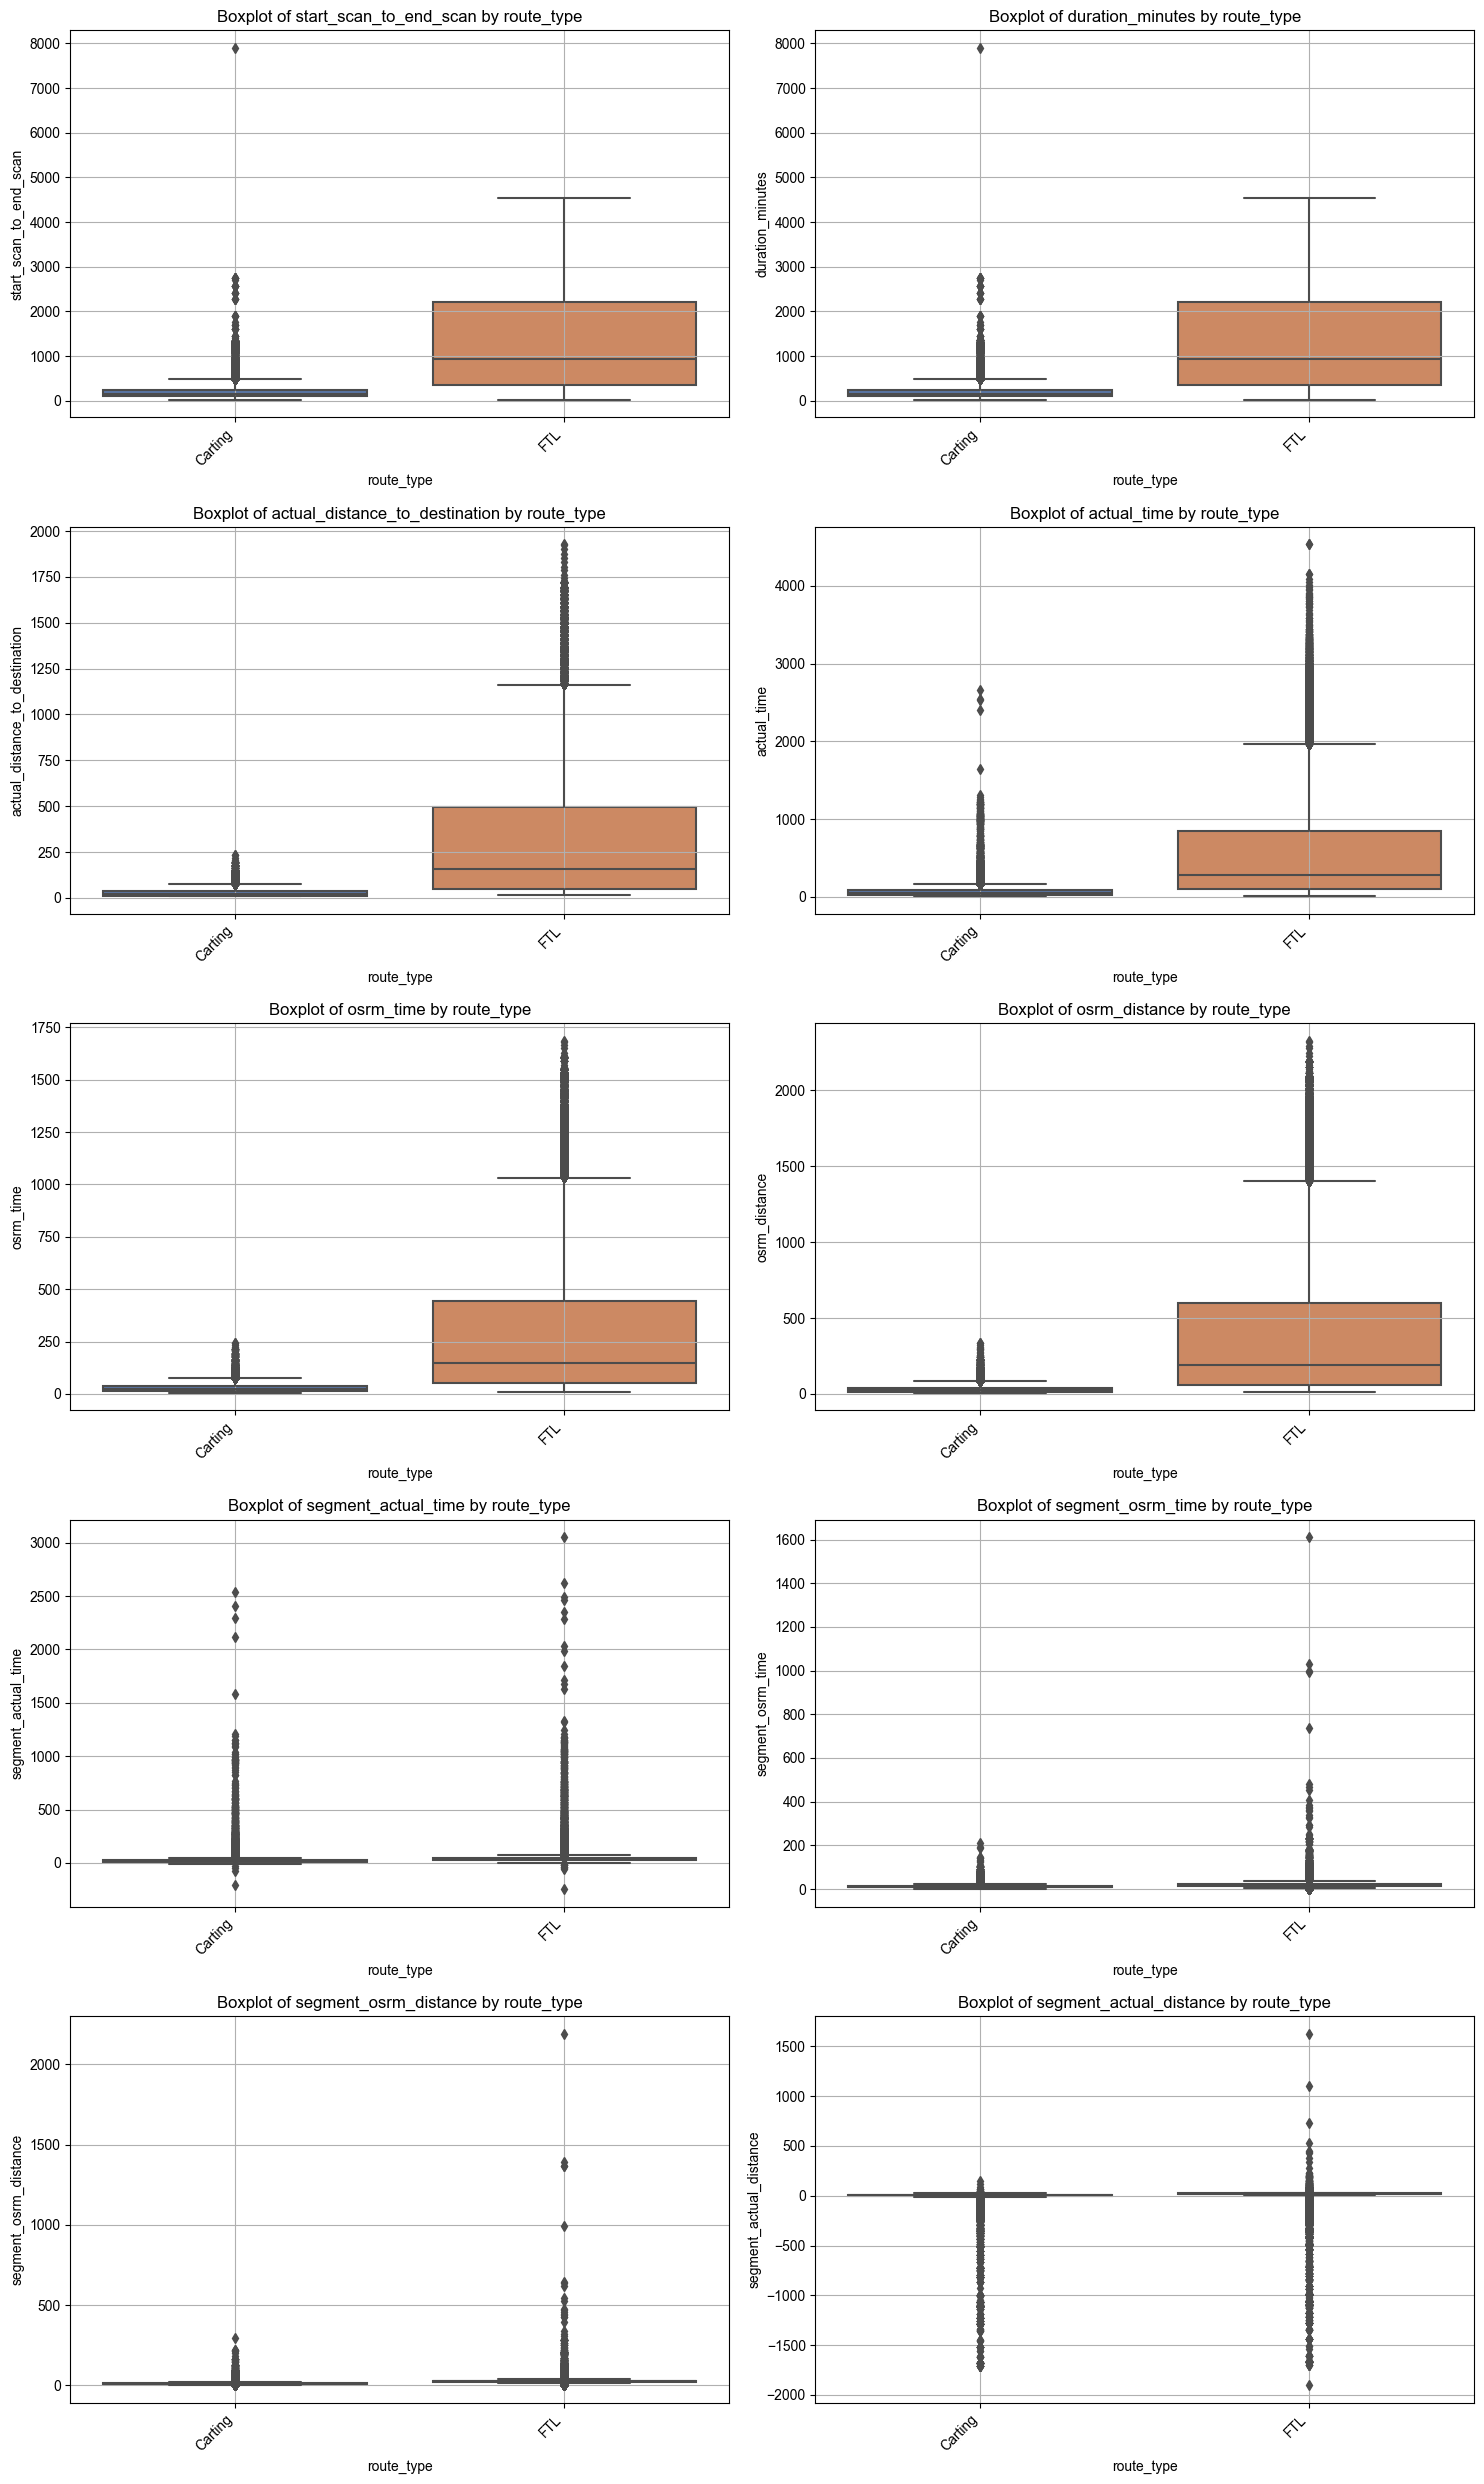

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For additional styling

# Assuming your DataFrame is named 'data'
# If not, replace 'data' with the actual name of your DataFrame
data = df
# Select float64 columns
float64_columns = data.select_dtypes(include='float64').columns

# Set up subplots with 2 columns
num_plots = len(float64_columns)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)

# Use Seaborn for better styling
sns.set(style="whitegrid")

# Plot boxplots for each float64 column against route_type
for i, column in enumerate(float64_columns):
    ax = axes[i // 2, i % 2]  # Row-wise filling of subplots
    
    # Use Seaborn boxplot for better aesthetics
    sns.boxplot(x='route_type', y=column, data=data, ax=ax)
    
    ax.set_title(f'Boxplot of {column} by route_type', fontsize=12)
    ax.set_xlabel('route_type', fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    
    # Add grid for better readability
    ax.grid(True)

    # Customize x-axis labels rotation for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## All numerical columns against day_name:
### We using violin plots and it tells us the outliers and the distribution of the data

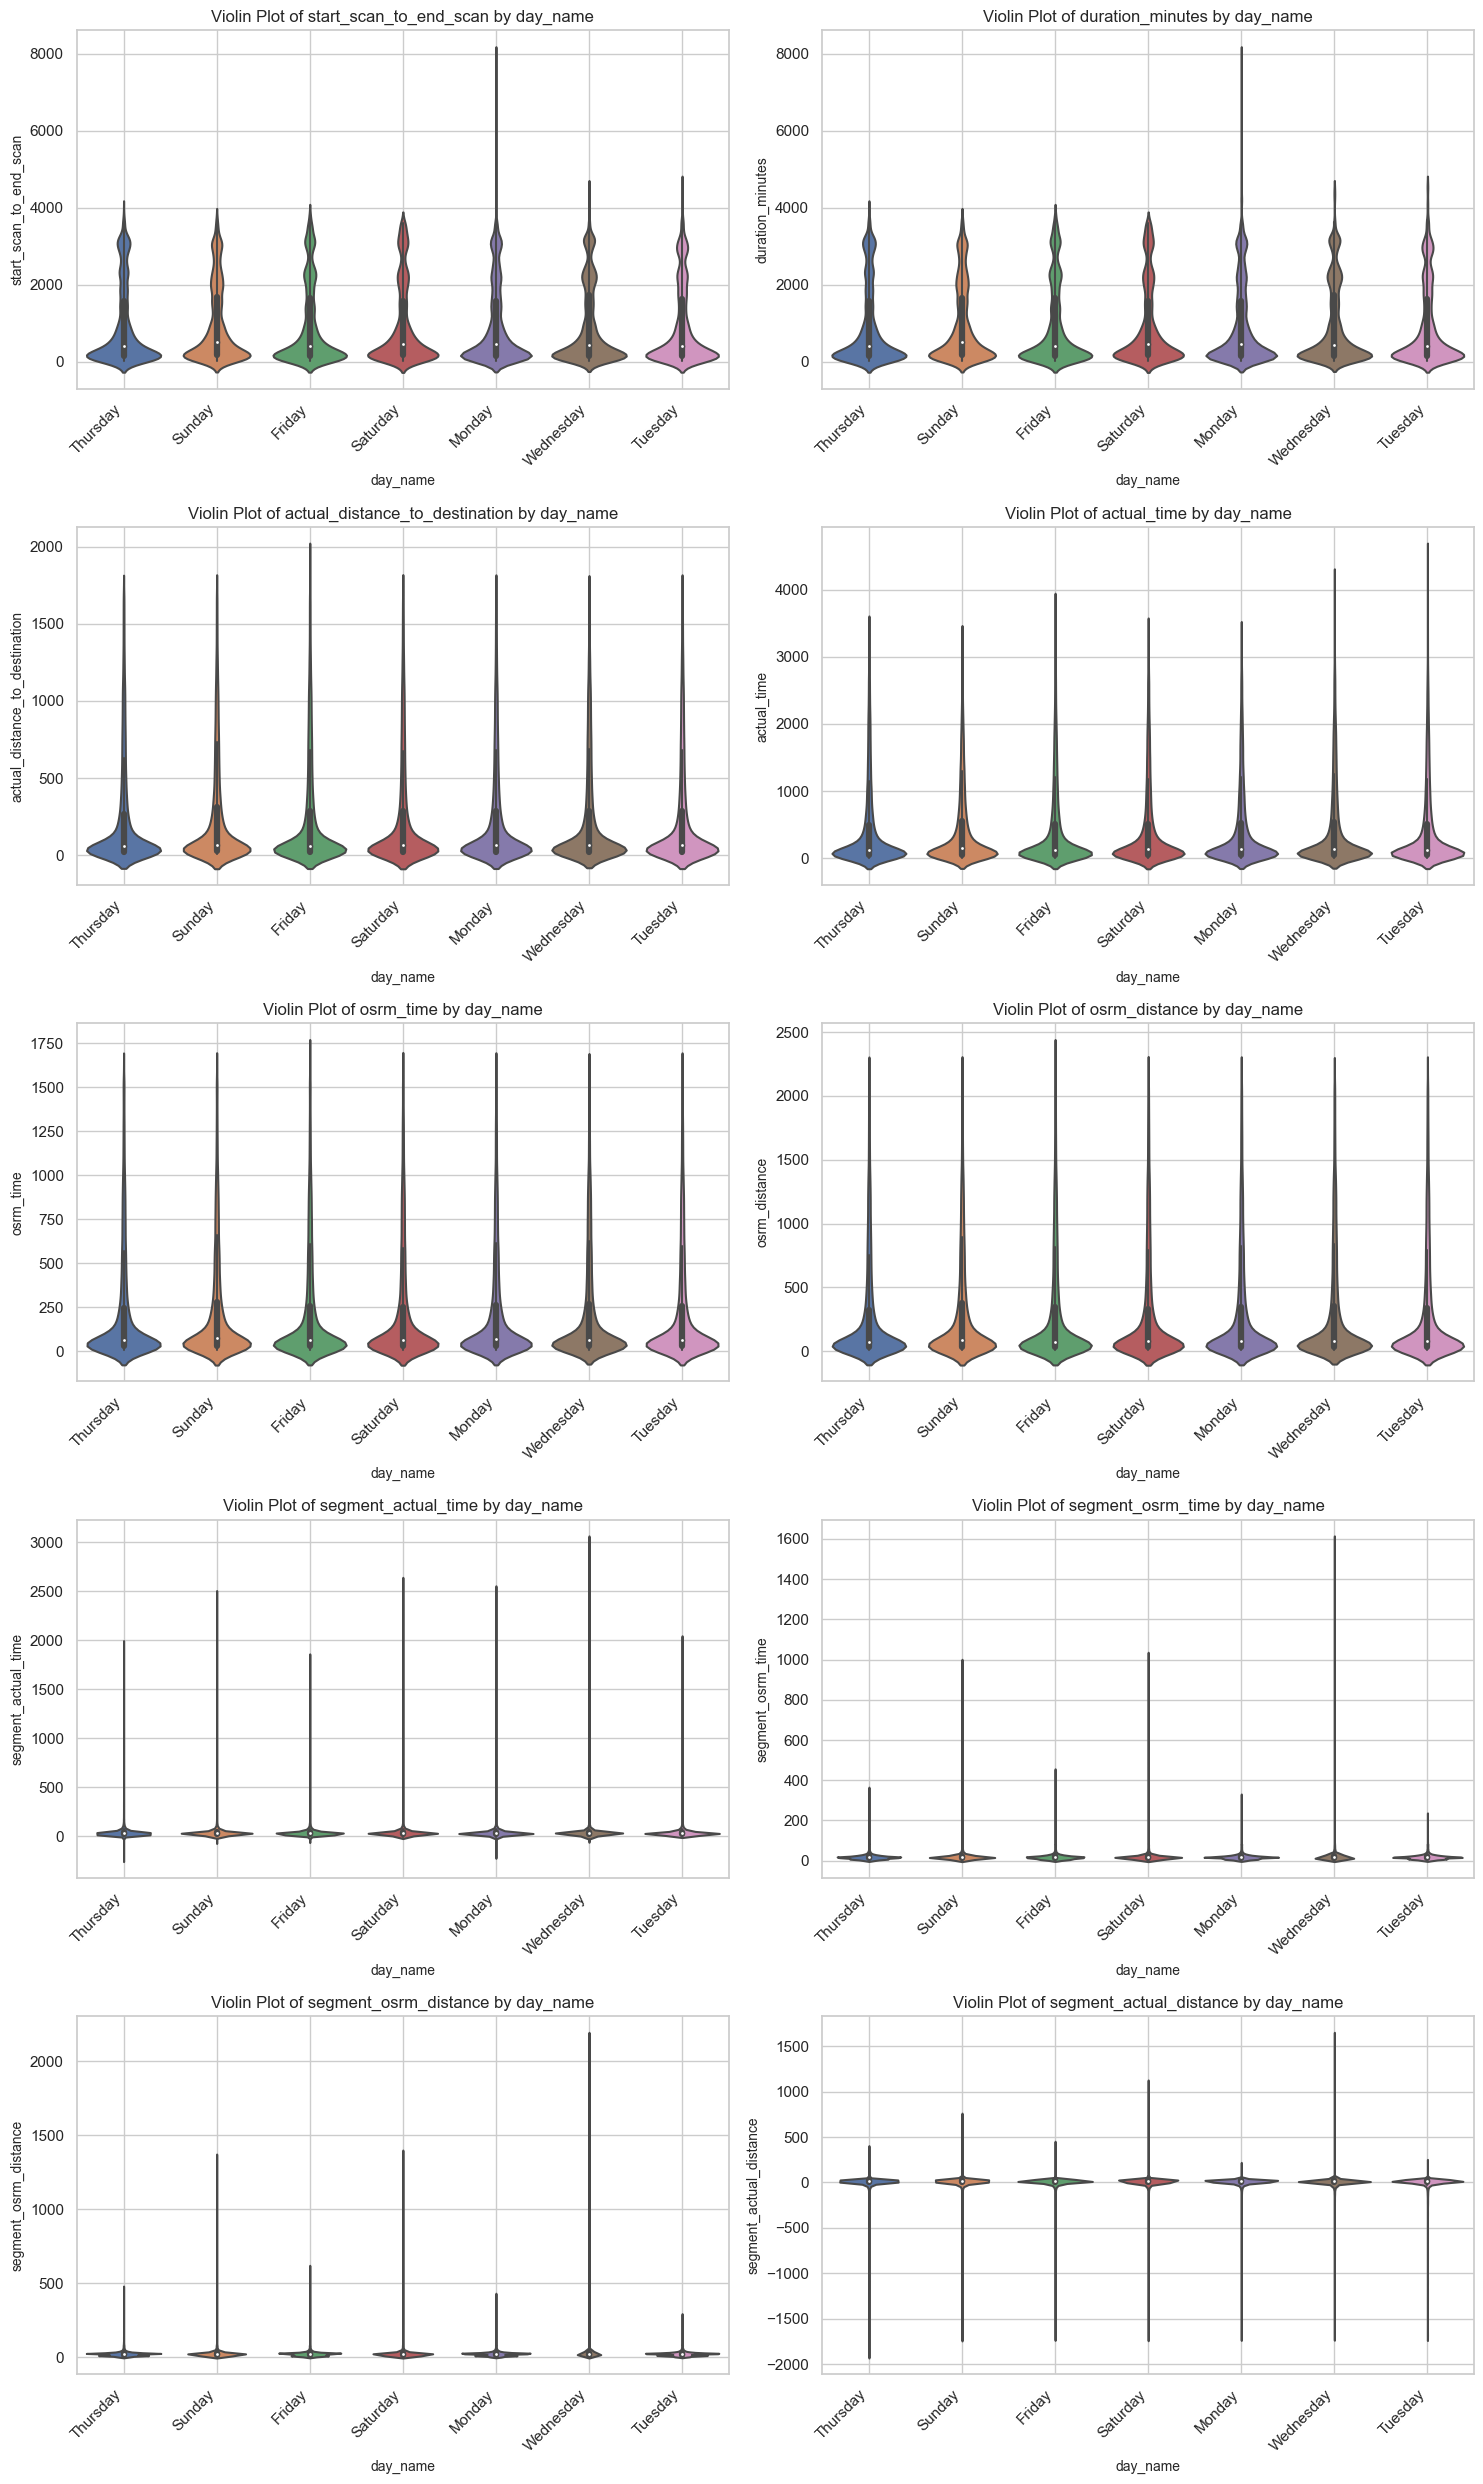

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For additional styling

# Assuming your DataFrame is named 'data'
# If not, replace 'data' with the actual name of your DataFrame

# Select float64 columns
float64_columns = data.select_dtypes(include='float64').columns

# Set up subplots with 2 columns
num_plots = len(float64_columns)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)

# Use Seaborn for better styling
sns.set(style="whitegrid")

# Plot violin plots for each float64 column against day_name
for i, column in enumerate(float64_columns):
    ax = axes[i // 2, i % 2]  # Row-wise filling of subplots
    
    # Use Seaborn violin plot for better aesthetics
    sns.violinplot(x='day_name', y=column, data=data, ax=ax)
    
    ax.set_title(f'Violin Plot of {column} by day_name', fontsize=12)
    ax.set_xlabel('day_name', fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    
    # Add grid for better readability
    ax.grid(True)

    # Customize x-axis labels rotation for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout
plt.tight_layout()
plt.show()




## Intra and Inter state comparisions with all numerical columns

In [50]:
# creating new column for plotting purpose:
data['simplified_trip_category'] = data['trip_category'].apply(lambda x: 'Inter' if 'Inter' in x else 'Intra')

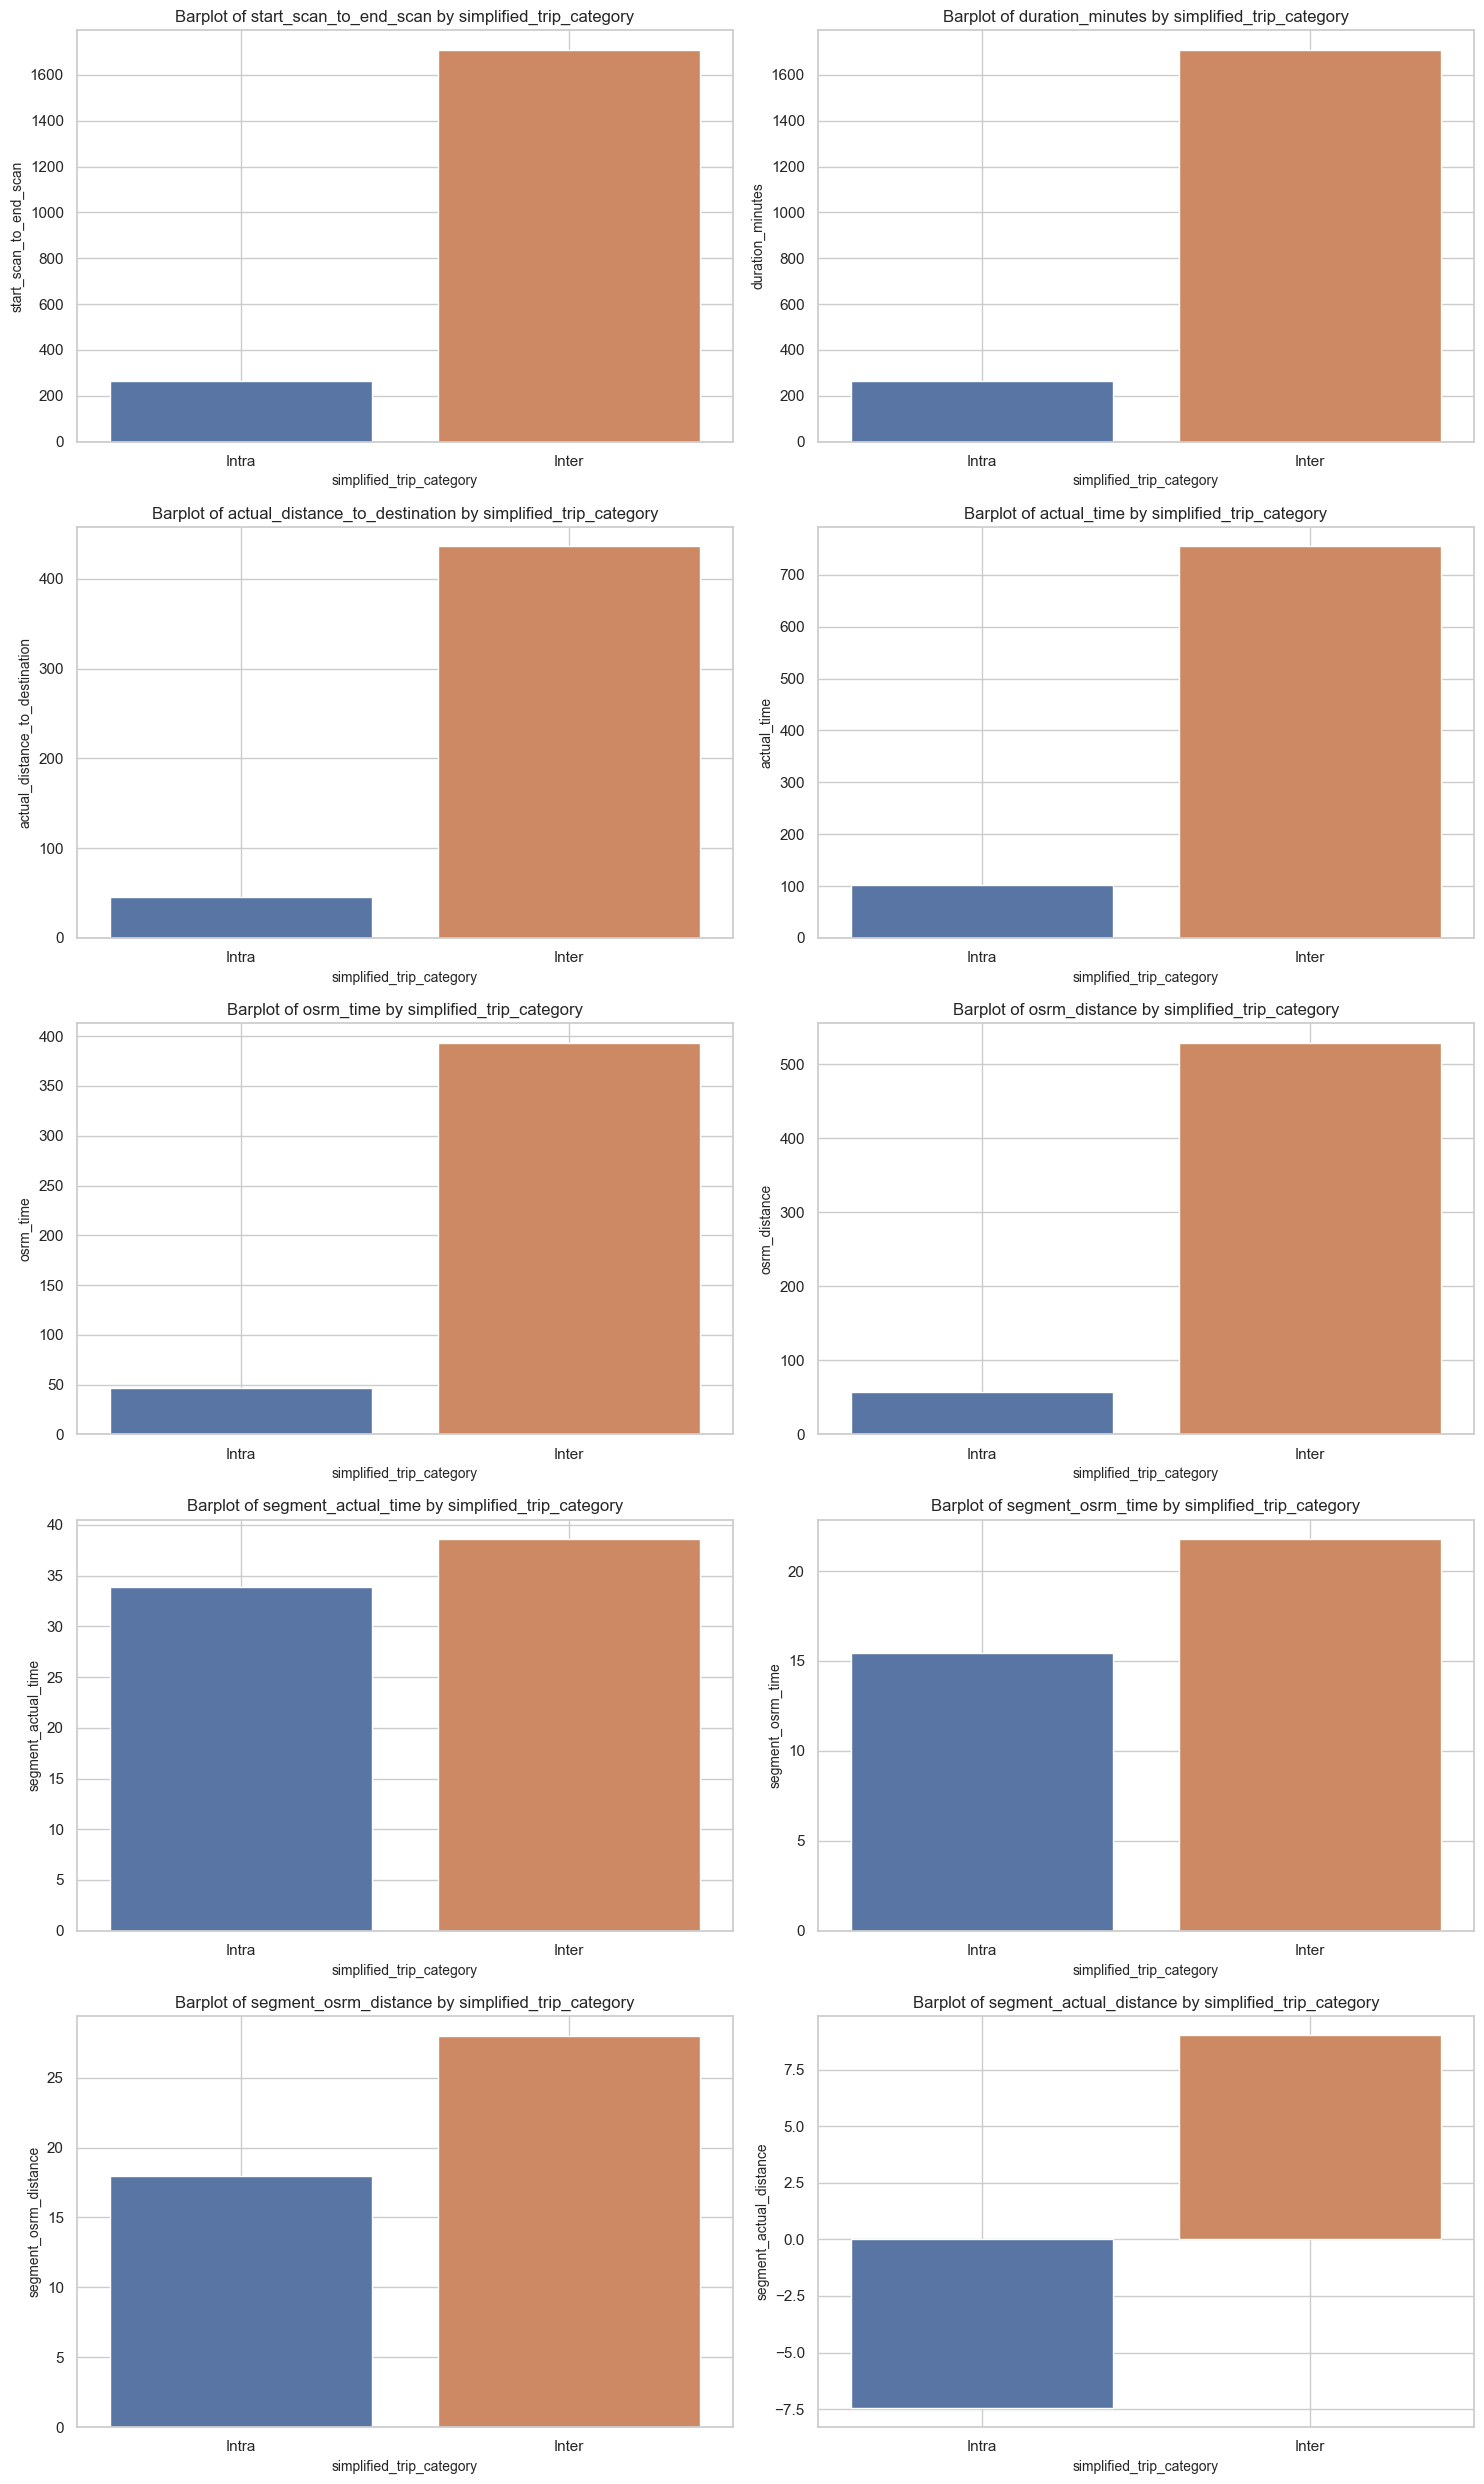

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For additional styling

# Assuming your DataFrame is named 'data'
# If not, replace 'data' with the actual name of your DataFrame

# Select float64 columns
float64_columns = data.select_dtypes(include='float64').columns


# Set up subplots with 2 columns
num_plots = len(float64_columns)
num_rows = (num_plots + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.5)

# Use Seaborn for better styling
sns.set(style="whitegrid")

# Plot barplots for each float64 column against simplified_trip_category
for i, column in enumerate(float64_columns):
    ax = axes[i // 2, i % 2]  # Row-wise filling of subplots
    
    # Use Seaborn barplot for better aesthetics
    sns.barplot(x='simplified_trip_category', y=column, data=data, ax=ax, ci=None)  # ci=None to disable confidence intervals
    
    ax.set_title(f'Barplot of {column} by simplified_trip_category', fontsize=12)
    ax.set_xlabel('simplified_trip_category', fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    
    # Add grid for better readability
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [52]:
# dropping the new column we created ie simplified_trip_category
df.drop(columns = 'simplified_trip_category',inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   year                            144316 non-null  int32  
 2   month                           144316 non-null  object 
 3   day                             144316 non-null  int32  
 4   day_name                        144316 non-null  object 
 5   trip_creation_time              144316 non-null  object 
 6   route_schedule_uuid             144316 non-null  object 
 7   route_type                      144316 non-null  object 
 8   trip_uuid                       144316 non-null  object 
 9   source_center                   144316 non-null  object 
 10  destination_center              144316 non-null  object 
 11  trip_category                   144316 non-null  object 
 12  source to destination

# 3. In depth analysis and Feature engineering

#### Hypothesis Testing between the following columns:
1. start_scan_to_end_scan vs duration_minutes
2. actual_distance_to_destination vs osrm_distance
3. actual_time vs osrm_time
4. segment_actual_time vs segment_osrm_time
5. segment_actual_distance vs segment_osrm_distance
6. route_type : It has two categories: FTL and Carting
7. day_name : It has 7 categories
8. month : It has only 2 categories ie September and October

Before conducting a two-sample t-test, it's important to check several assumptions to ensure the validity of the test results. The key assumptions for a two-sample t-test are:

Normality:

Assumption: The data in each group should follow a normal distribution.
How to Check: Visual inspection using histograms or probability plots, or statistical tests like the Shapiro-Wilk test or Kolmogorov-Smirnov test.
Homogeneity of Variances (Homoscedasticity):

Assumption: The variances of the two groups should be approximately equal.
How to Check: Levene's test or Bartlett's test for homogeneity of variances.
Independence:

Assumption: Observations within each group should be independent of each other.
How to Check: Ensure that the data points are collected independently and not influenced by each other.

### 1. start_scan_to_end_scan vs duration_minutes

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind


In [55]:
data = df

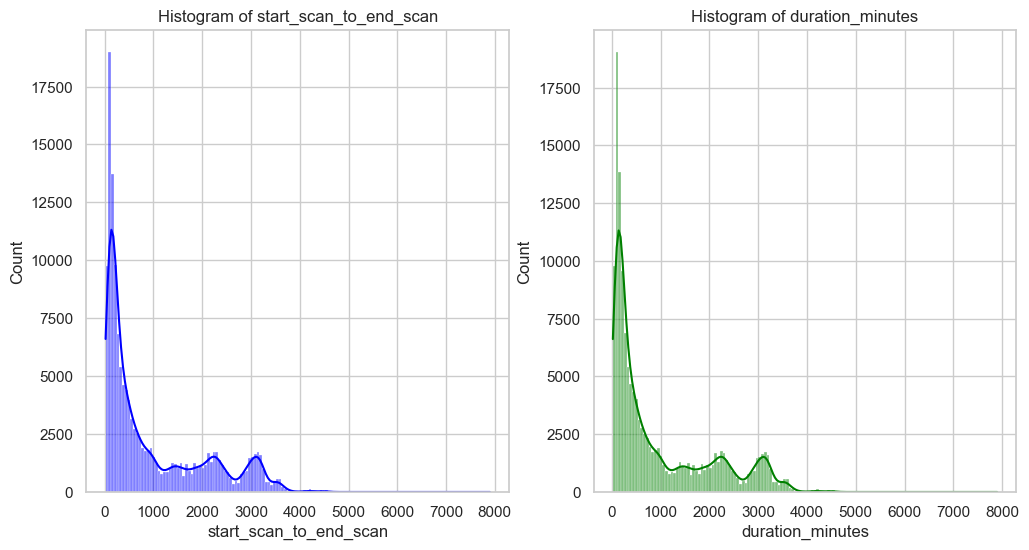

In [56]:
# plotting the distribution:
# Visualize histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['start_scan_to_end_scan'], kde=True, color='blue')
plt.title('Histogram of start_scan_to_end_scan')

plt.subplot(1, 2, 2)
sns.histplot(data['duration_minutes'], kde=True, color='green')
plt.title('Histogram of duration_minutes')

plt.show()


In [57]:
# Shapiro-Wilk test for normality
stat_start_scan, p_start_scan = shapiro(data['start_scan_to_end_scan'])
stat_duration, p_duration = shapiro(data['duration_minutes'])

print(f"Shapiro-Wilk test for start_scan_to_end_scan: Statistic={stat_start_scan}, p-value={p_start_scan}")
print(f"Shapiro-Wilk test for duration_minutes: Statistic={stat_duration}, p-value={p_duration}")


Shapiro-Wilk test for start_scan_to_end_scan: Statistic=0.805571436882019, p-value=0.0
Shapiro-Wilk test for duration_minutes: Statistic=0.8055532574653625, p-value=0.0


## Observation from Shapiro Wilk Test
A small p-value from the Shapiro-Wilk test suggests that the departure from normality is statistically significant.

In [58]:
# Levene's test for homogeneity of variances
stat_levene, p_levene = levene(data['start_scan_to_end_scan'], data['duration_minutes'])

print(f"Levene's test for homogeneity of variances: Statistic={stat_levene}, p-value={p_levene}")


Levene's test for homogeneity of variances: Statistic=1.5509082942854436e-06, p-value=0.9990063598533395


## Observation from lavene test:
 Levene's test for homogeneity of variances, a p-value of 0.99 indicates that there is no significant evidence to reject the null hypothesis. The null hypothesis in Levene's test is that the variances of the two groups are equal. Therefore, a high p-value suggests that there is no strong statistical evidence to conclude that the variances are significantly different.

# Observation:
The data is almost pareto distributed and its not gaussian distibuted but we will use bootstrapping

In [59]:
import numpy as np
from sklearn.utils import resample

def bootstrap_two_sample_test(data1, data2, num_bootstrap_samples=1000, test_statistic=np.mean, alpha=0.05):
    """
    Perform a two-sample hypothesis test using bootstrap resampling.

    Parameters:
    - data1, data2: NumPy arrays or pandas Series representing the two samples.
    - num_bootstrap_samples: Number of bootstrap samples to generate.
    - test_statistic: Function to compute the test statistic (default is mean).
    - alpha: Significance level for hypothesis testing (default is 0.05).

    Returns:
    - p_value: The calculated p-value for the hypothesis test.
    - result: String indicating whether to 'Reject H0' or 'Fail to reject H0.'
    """

    # Compute the observed test statistic
    observed_statistic = test_statistic(data1) - test_statistic(data2)

    # Initialize an array to store bootstrap sample statistics
    bootstrap_statistics = np.zeros(num_bootstrap_samples)

    # Perform bootstrapping
    for i in range(num_bootstrap_samples):
        # Generate a bootstrap sample with replacement
        bootstrap_sample1 = resample(data1)
        bootstrap_sample2 = resample(data2)

        # Calculate the test statistic for the bootstrap samples
        bootstrap_statistics[i] = test_statistic(bootstrap_sample1) - test_statistic(bootstrap_sample2)

    # Calculate the p-value based on the bootstrap distribution
    p_value = (np.abs(bootstrap_statistics) >= np.abs(observed_statistic)).mean()

    # Null Hypothesis (H0): There is no significant difference between the two populations.
    # Alternative Hypothesis (H1): There is a significant difference between the two populations.

    # Determine whether to accept or reject the null hypothesis
    if p_value <= alpha:
        result = "Reject H0"
    else:
        result = "Fail to reject H0"

    print(f"Bootstrap p-value: {p_value}")
    print(f"Result: {result}")

    return p_value, result




In [60]:
# Example usage:
p_value, result = bootstrap_two_sample_test(data['start_scan_to_end_scan'], data['duration_minutes'])
print(f"Result: {result}")

Bootstrap p-value: 0.908
Result: Fail to reject H0
Result: Fail to reject H0


### 2. actual_distance_to_destination vs osrm_distance

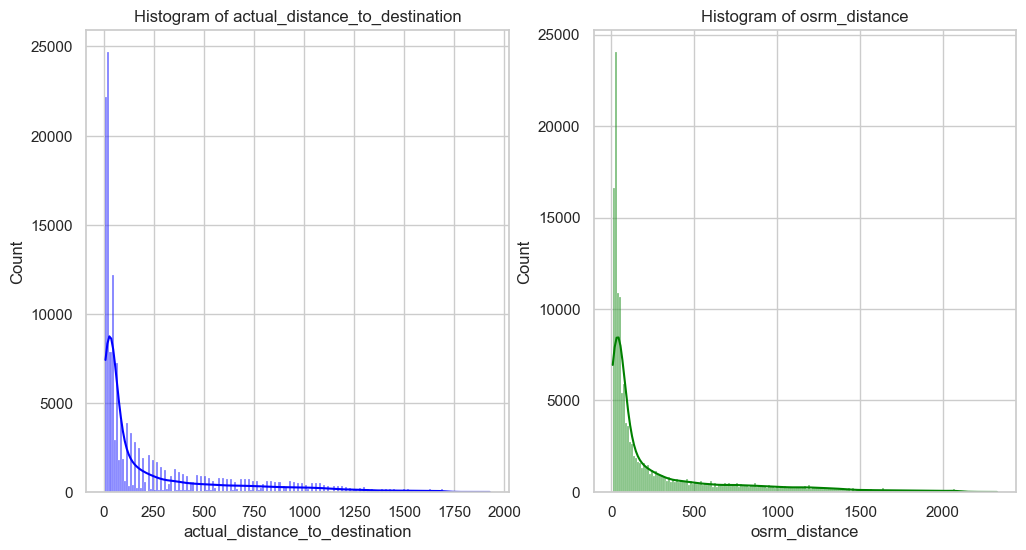

In [61]:
# plotting the distribution:
# Visualize histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['actual_distance_to_destination'], kde=True, color='blue')
plt.title('Histogram of actual_distance_to_destination')

plt.subplot(1, 2, 2)
sns.histplot(data['osrm_distance'], kde=True, color='green')
plt.title('Histogram of osrm_distance')

plt.show()


### Observation:
The graphs are perfectly pareto distributed and hence we can transform them using boxcox transform

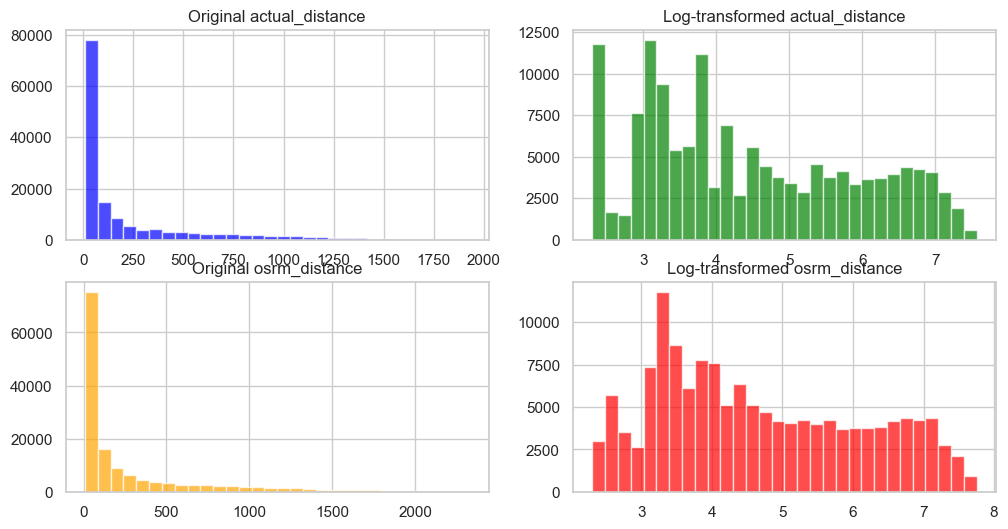

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have pandas DataFrame with columns 'actual_distance_to_destination' and 'osrm_distance'
# Replace 'your_dataframe' with the actual variable representing your DataFrame

# Extract the columns
actual_distance = df['actual_distance_to_destination']
osrm_distance = df['osrm_distance']

# Apply log transformation
log_actual_distance = np.log1p(actual_distance)
log_osrm_distance = np.log1p(osrm_distance)

# Plot the original and log-transformed data
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(actual_distance, bins=30, color='blue', alpha=0.7)
plt.title('Original actual_distance')

plt.subplot(2, 2, 2)
plt.hist(log_actual_distance, bins=30, color='green', alpha=0.7)
plt.title('Log-transformed actual_distance')

plt.subplot(2, 2, 3)
plt.hist(osrm_distance, bins=30, color='orange', alpha=0.7)
plt.title('Original osrm_distance')

plt.subplot(2, 2, 4)
plt.hist(log_osrm_distance, bins=30, color='red', alpha=0.7)
plt.title('Log-transformed osrm_distance')

plt.show()


### Problem:
Even after log normal transformation, our data is not gaussian distributed so its very difficult to do TTest since it holds an assumption that the data must be gaussian distributed.

### Solution:
Since the log normal failed to transform our data, we will choose bootstrap sampling technique of these two columns and will find out our p value

#### Null hypothesis(h0): There is no difference between the population of these two columns
#### Alternative hypothesis(ha): There is significant difference between these two columns

In [63]:
# Example usage:
p_value, result = bootstrap_two_sample_test(data['actual_distance_to_destination'], data['osrm_distance'])
print(f"Result: {result}")

Bootstrap p-value: 0.494
Result: Fail to reject H0
Result: Fail to reject H0


### 3. actual_time vs osrm_time

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def log_normal_transform_and_plot(column1, column2):
    # Log-normal distribution parameters (shape parameter 's' and scale parameter 'scale')
    lognorm_params1 = {'s': 0.954, 'scale': np.exp(np.mean(column1))}
    lognorm_params2 = {'s': 0.954, 'scale': np.exp(np.mean(column2))}

    # Log-normal transformation
    log_transformed_col1 = np.log1p(column1)
    log_transformed_col2 = np.log1p(column2)

    # Set a reasonable range for PDF calculation
    bins = np.linspace(np.min([log_transformed_col1, log_transformed_col2]),
                       np.max([log_transformed_col1, log_transformed_col2]), 30)

    # Log-normal PDF for plotting
    pdf_lognorm_col1 = np.exp(lognorm.logpdf(bins, **lognorm_params1))
    pdf_lognorm_col2 = np.exp(lognorm.logpdf(bins, **lognorm_params2))

    # Plot histograms for original and log-transformed data
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(column1, bins=30, color='blue', alpha=0.7, label='Original col1')
    plt.hist(column2, bins=30, color='green', alpha=0.7, label='Original col2')
    plt.title('Histogram of Original Data')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(log_transformed_col1, bins=30, color='blue', alpha=0.7, label='Log-transformed col1')
    plt.plot(bins, pdf_lognorm_col1 * len(log_transformed_col1) / 30, 'r-', lw=2, label='Log-normal PDF col1')

    plt.hist(log_transformed_col2, bins=30, color='green', alpha=0.7, label='Log-transformed col2')
    plt.plot(bins, pdf_lognorm_col2 * len(log_transformed_col2) / 30, 'r--', lw=2, label='Log-normal PDF col2')

    plt.title('Histogram and Log-normal PDF of Log-transformed Data')
    plt.xlabel('Log-transformed Values')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a DataFrame 'df' with columns 'numerical_column1' and 'numerical_column2'
# log_normal_transform_and_plot(df['numerical_column1'], df['numerical_column2'])


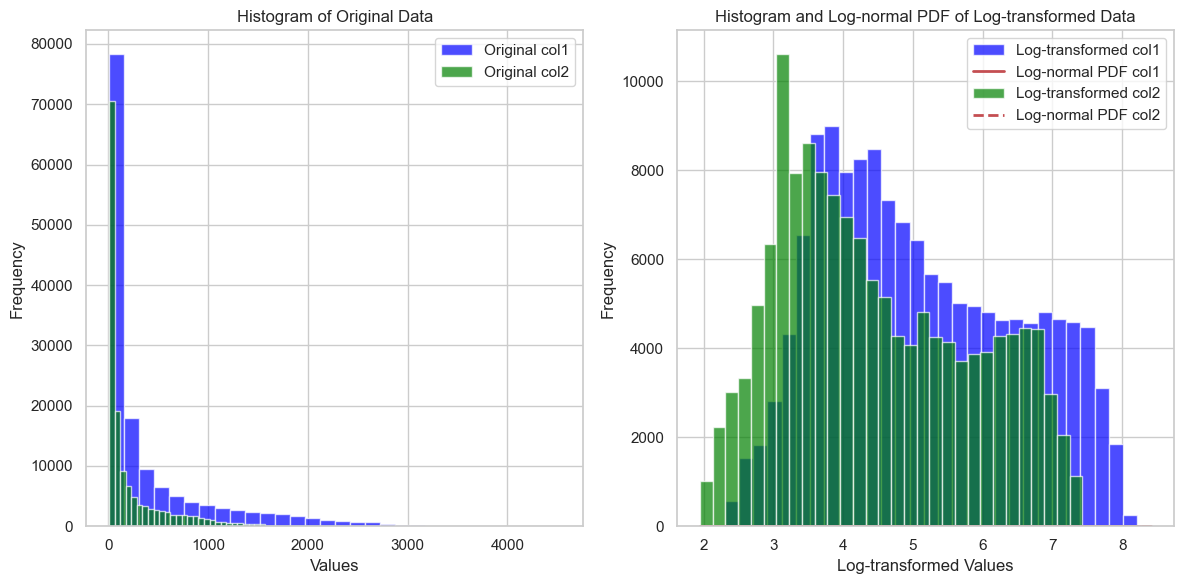

In [65]:
log_normal_transform_and_plot(data['actual_time'],data['osrm_time'])

### Problem:
Again the data is not normally distributed even after log normal distribution and we will use bootstrapping

In [66]:

p_value, result = bootstrap_two_sample_test(data['actual_time'], data['osrm_time'])
print(f"Result: {result}")

Bootstrap p-value: 0.495
Result: Fail to reject H0
Result: Fail to reject H0


### 4. segment_actual_time vs segment_osrm_time

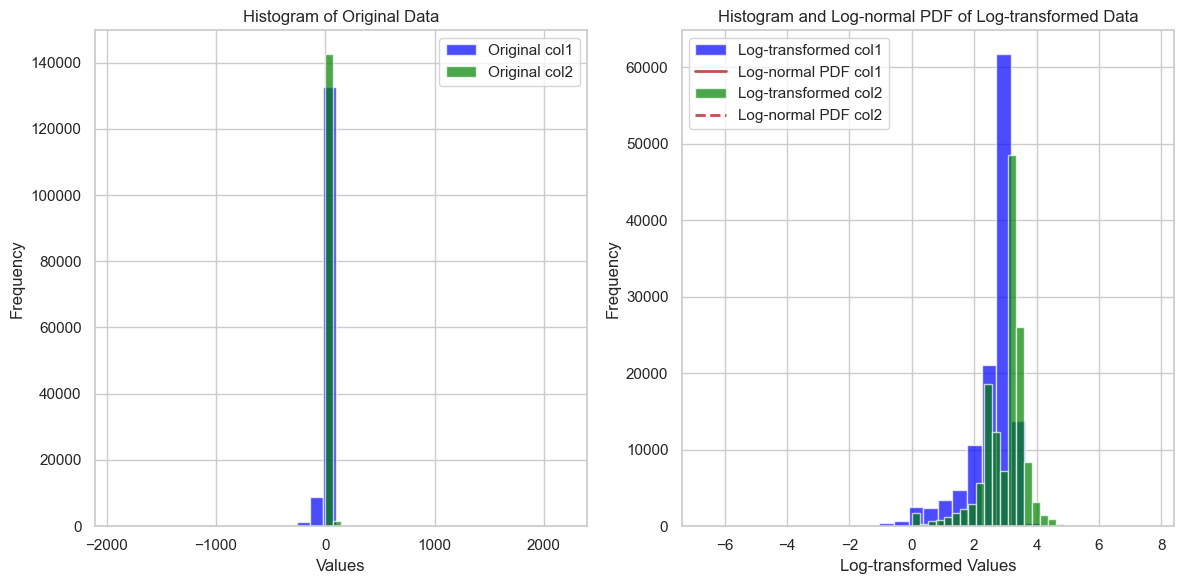

In [67]:
log_normal_transform_and_plot(df['segment_actual_distance'],df['segment_osrm_distance'])

In [68]:
p_value, result = bootstrap_two_sample_test(data['segment_actual_distance'], data['segment_osrm_distance'])
print(f"Result: {result}")

Bootstrap p-value: 0.497
Result: Fail to reject H0
Result: Fail to reject H0


In [69]:
df.head()

,data,year,month,day,day_name,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,...,start_scan_to_end_scan,duration_minutes,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_distance
0,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,10.435660
1,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,8.501182
2,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,8.700437
3,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,8.480749
4,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,86.0,86.213637,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,3.268012


In [70]:
#selecting numerical columns
# Assuming 'df' is your DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['year', 'day', 'start_scan_to_end_scan', 'duration_minutes',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_actual_distance'],
      dtype='object')


### Normalizing our data

In [71]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['start_scan_to_end_scan', 'duration_minutes', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_distance']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns and create new columns for scaled values
scaled_columns = [f"{col}_scaled" for col in columns_to_scale]
df[scaled_columns] = scaler.fit_transform(df[columns_to_scale])

In [72]:
# Drop the original unscaled columns
df.drop(columns=columns_to_scale, inplace=True)

In [73]:
df.columns

Index(['data', 'year', 'month', 'day', 'day_name', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'destination_center', 'trip_category', 'source to destination',
       'start_scan_to_end_scan_scaled', 'duration_minutes_scaled',
       'actual_distance_to_destination_scaled', 'actual_time_scaled',
       'osrm_time_scaled', 'osrm_distance_scaled',
       'segment_actual_time_scaled', 'segment_osrm_time_scaled',
       'segment_osrm_distance_scaled', 'segment_actual_distance_scaled'],
      dtype='object')

In [74]:
df.head()

,data,year,month,day,day_name,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,...,start_scan_to_end_scan_scaled,duration_minutes_scaled,actual_distance_to_destination_scaled,actual_time_scaled,osrm_time_scaled,osrm_distance_scaled,segment_actual_time_scaled,segment_osrm_time_scaled,segment_osrm_distance_scaled,segment_actual_distance_scaled
0,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,0.008378,0.008316,0.000748,0.001105,0.002976,0.001276,0.078300,0.006828,0.005460,0.542115
1,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,0.008378,0.008316,0.005180,0.003316,0.008333,0.005488,0.077086,0.005587,0.004453,0.541567
2,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,0.008378,0.008316,0.009715,0.006854,0.013095,0.010155,0.078907,0.004345,0.004935,0.541623
3,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,0.008378,0.008316,0.014135,0.011718,0.020238,0.015775,0.080425,0.007449,0.005942,0.541561
4,training,2018,September,20,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,...,0.008378,0.008316,0.015839,0.013044,0.022619,0.019511,0.075873,0.003104,0.001787,0.540086


In [75]:
df['route_type'].value_counts()

route_type
FTL        99132
Carting    45184
Name: count, dtype: int64

# Using TSNE:

In [76]:
# Assuming 'df' is your DataFrame
features = df[['start_scan_to_end_scan_scaled', 'duration_minutes_scaled',
               'actual_distance_to_destination_scaled', 'actual_time_scaled',
               'osrm_time_scaled', 'osrm_distance_scaled',
               'segment_actual_time_scaled', 'segment_osrm_time_scaled',
               'segment_osrm_distance_scaled', 'segment_actual_distance_scaled']]

In [77]:
import pandas as pd
import umap


# Number of components in the lower-dimensional space
n_components_umap = 2  # Choose the number based on your requirements

# Apply UMAP with various optimizations
umap_model = umap.UMAP(
    n_neighbors=15,        # Adjust the number of neighbors
    n_components=n_components_umap,
    metric='euclidean',    # Use the Euclidean metric
    angular_rp_forest=True, # Use Angular Random Projection for approximate nearest neighbors
    low_memory=True,        # Trade-off memory for speed
    random_state=42
)

# Fit and transform the data using UMAP
umap_components = umap_model.fit_transform(features)

# Create a DataFrame with the UMAP components
umap_df = pd.DataFrame(data=umap_components, columns=['Component 1', 'Component 2'])

# Display the resulting UMAP DataFrame
print(umap_df.head())


   Component 1  Component 2
0    -8.355756    16.676947
1    -9.738311     9.878369
2    -8.816648     5.346571
3    -7.184127     3.811086
4    -3.230291     0.835535


In [78]:
umap_df.size

288632

In [79]:
df.columns

Index(['data', 'year', 'month', 'day', 'day_name', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'destination_center', 'trip_category', 'source to destination',
       'start_scan_to_end_scan_scaled', 'duration_minutes_scaled',
       'actual_distance_to_destination_scaled', 'actual_time_scaled',
       'osrm_time_scaled', 'osrm_distance_scaled',
       'segment_actual_time_scaled', 'segment_osrm_time_scaled',
       'segment_osrm_distance_scaled', 'segment_actual_distance_scaled'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   data                                   144316 non-null  object 
 1   year                                   144316 non-null  int32  
 2   month                                  144316 non-null  object 
 3   day                                    144316 non-null  int32  
 4   day_name                               144316 non-null  object 
 5   trip_creation_time                     144316 non-null  object 
 6   route_schedule_uuid                    144316 non-null  object 
 7   route_type                             144316 non-null  object 
 8   trip_uuid                              144316 non-null  object 
 9   source_center                          144316 non-null  object 
 10  destination_center                     144316 non-null  objec

In [81]:
df1 = df[['data', 'year', 'month', 'day', 'day_name', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'destination_center', 'trip_category', 'source to destination']]

In [82]:
umap_df.size/2

144316.0

In [83]:
new_df = pd.concat([df1, umap_df], axis=1)

In [84]:
new_df

,data,year,month,day,day_name,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,trip_category,source to destination,Component 1,Component 2
0,training,2018.0,September,20.0,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,-8.355756,16.676947
1,training,2018.0,September,20.0,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,-9.738311,9.878369
2,training,2018.0,September,20.0,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,-8.816648,5.346571
3,training,2018.0,September,20.0,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,-7.184127,3.811086
4,training,2018.0,September,20.0,Thursday,02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Intra State (Gujarat),Anand_VUNagar_DC to Khambhat_MotvdDPP_D,-3.230291,0.835535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.407673,9.664940
140731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.858353,7.326417
142482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.951719,5.268094
142483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.202196,5.426704
